In [1]:
import requests
from requests.auth import HTTPBasicAuth
import time
import xarray as xr
import os


def download_file(api_url, username, password, local_filename):
    """
    Downloads a file from a GET API endpoint using Basic Authentication.

    Parameters:
        api_url (str): The API endpoint URL to download the file.
        username (str): The username for Basic Authentication.
        password (str): The password for Basic Authentication.
        local_filename (str): The name to save the file locally.

    Returns:
        str: The path to the downloaded file.
    """
    try:
        # Start the timer
        start_time = time.time()

        # Perform the GET request with Basic Authentication
        response = requests.get(api_url, auth=HTTPBasicAuth(username, password), stream=True)

        # Stop the timer and calculate response time
        response_time = time.time() - start_time

        # Check if the request was successful
        if response.status_code == 200:
            # Write the content to a local file
            with open(local_filename, 'wb') as file:
                for chunk in response.iter_content(chunk_size=8192):  # Download in chunks
                    file.write(chunk)

            # Get the file size
            file_size = os.path.getsize(local_filename)

            print(f"File successfully downloaded as '{local_filename}'")
            print(f"Total response time: {response_time:.2f} seconds")
            print(f"File size: {file_size / 1024:.2f} KB")

            return local_filename
        else:
            print(f"Failed to download file. HTTP Status Code: {response.status_code}")
            print("Response:", response.text)
            return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

In [ ]:
# product type and attribute list can be viewed in
# https://kartoza.github.io/tomorrownow_gap/developer/api/guide/measurement/#gap-input-data-table
product = 'cbam_historical_analysis'
# Define the attributes to fetch
attribs = [
    "max_temperature",
    "min_temperature"
]
# start and end dates in format YYYY-MM-DD
start_date = '2020-01-01'
end_date = '2020-01-03'
# available output type: json, csv, netcdf
# Note that json output is only for single location query
output_type = 'netcdf'
# area bounding box (long min, lat min, long max, lat max)
bbox = '33.9, -4.67, 41.89, 5.5'
# for single point query, we can use lat and lon parameters
# lat = '',
# lon = ''
# for custom polygon/bounding box, you can upload a shapefile and provides the location_name
# location_name = ''

In [3]:
# Construct the API URL
api_url = (
    f"https://tngap.sta.do.kartoza.com/api/v1/measurement/?product={product}&" +
    "attributes=" + ",".join(attribs) + "&" +
    f"start_date={start_date}&end_date={end_date}&output_type={output_type}&"
    f"bbox={bbox}"
)

In [4]:
# Set your username and password
username = ""
password = ""

In [5]:
# Set the output file path
local_filename = "data.nc"

In [6]:
# Call the download file function
download_file(api_url, username, password, local_filename)

File successfully downloaded as 'data.nc'
Total response time: 0.79 seconds
File size: 1496.88 KB


'data.nc'

Reading NetCDF file with xarray...
<xarray.Dataset> Size: 2MB
Dimensions:          (date: 3, lat: 285, lon: 222)
Coordinates:
  * date             (date) datetime64[ns] 24B 2020-01-01 2020-01-02 2020-01-03
  * lat              (lat) float64 2kB -4.662 -4.626 -4.59 ... 5.418 5.454 5.489
  * lon              (lon) float64 2kB 33.92 33.95 33.99 ... 41.8 41.84 41.87
Data variables:
    max_temperature  (date, lat, lon) float32 759kB ...
    min_temperature  (date, lat, lon) float32 759kB ...
Frozen({'max_temperature': <xarray.Variable (date: 3, lat: 285, lon: 222)> Size: 759kB
[189810 values with dtype=float32]
Attributes:
    Description:  Maximum temperature (0000:2300)
    Units:        Deg C, 'min_temperature': <xarray.Variable (date: 3, lat: 285, lon: 222)> Size: 759kB
[189810 values with dtype=float32]
Attributes:
    Description:  Minimum temperature (0000:2300)
    Units:        Deg C, 'date': <xarray.IndexVariable 'date' (date: 3)> Size: 24B
array(['2020-01-01T00:00:00.000000000',

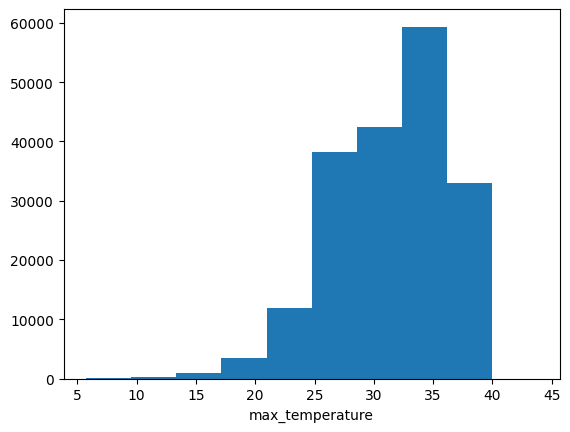

In [7]:
# Read the NetCDF file using xarray
if os.path.exists(local_filename):
    print("Reading NetCDF file with xarray...")
    ds = xr.open_dataset(local_filename)
    print(ds)

    print(ds.variables)  # List all variables
    print(ds['max_temperature'])  # Access a specific variable
    ds['max_temperature'].plot()  # Plot data (requires matplotlib)
else:
    print("Downloaded file not found in the filesystem.")